In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
# making datasets from pre-loaded .npy files
import numpy as np
from sklearn.utils import shuffle # for shuffling X and y in unison
# loading all available data
dataset_1 = np.load('/content/thumbs-up.npy') # contains images as np.array
dataset_1_labels = np.load('/content/thumbs-up_labels.npy') # contains labels
dataset_2 = np.load('/content/thumbs-down.npy')
dataset_2_labels = np.load('/content/thumbs-down_labels.npy')
X = np.concatenate((dataset_1, dataset_2))
y = np.concatenate((dataset_1_labels, dataset_2_labels))
X, y = shuffle(X, y, random_state=0)
print(X.shape, y.shape)
print(y[0:10])

(501, 49152) (501,)
['thumbs-up' 'thumbs-up' 'thumbs-up' 'thumbs-down' 'thumbs-down' 'thumbs-up' 'thumbs-down' 'thumbs-up' 'thumbs-up'
 'thumbs-up']


In [0]:
# splitting data into test and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100,
                                                    random_state=42)

In [24]:
# making dataframe
import pandas as pd
df = pd.DataFrame.from_records(X)
df['labels'] = y
print(df.head())

     0    1    2    3    4    5  ...  49147  49148  49149  49150  49151       labels
0  255  255  255  255  255  255  ...    255    255    255    255    255    thumbs-up
1  206  206  206  255  255  255  ...    255    255    206    206    206    thumbs-up
2  255  255  255  255  255  255  ...    255    255    255    255    255    thumbs-up
3  255  255  255  255  255  255  ...    255    255    255    255    255  thumbs-down
4   75  196  216   76  197  217  ...    221    233    124    220    233  thumbs-down

[5 rows x 49153 columns]


In [90]:
# making ImageDataBunch object
path = Path('/content/drive/My Drive/classification_1/')
print('hello:\n', path.ls())
data = ImageList.from_folder(path=path, recurse=True)
data
# From what I found, storing the data in a particular folder structue
# gives the easiest way to load the data into a DataBunch object
# The folder structure is as folows
# main_folder
# ----------/Train_folder
# ----------------/class_1
# ----------------/class_2 
..
# ----------/Validation_folder
# ---------------------------/class_1
# ---------------------------/class_2 
..
# Then we can simply get an ImageList object using from_folder() function
# recurse=True tells fastai to look recursively into the subfolders

hello:
 [PosixPath('/content/drive/My Drive/classification_1/Valid'), PosixPath('/content/drive/My Drive/classification_1/Train')]


ImageList (511 items)
Image (3, 400, 400),Image (3, 600, 600),Image (3, 450, 450),Image (3, 800, 800),Image (3, 500, 500)
Path: /content/drive/My Drive/classification_1

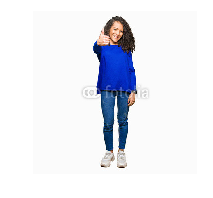

In [91]:
data[0].show() # All data loaded

In [0]:
data = data.split_by_folder(train='Train', valid='Valid')
# Once the data is loaded into an ImageList we can simply split 
# it using split_by_folder since we already stored the data in
# a particular way.

In [93]:
data

ItemLists;

Train: ImageList (460 items)
Image (3, 800, 800),Image (3, 350, 350),Image (3, 386, 386),Image (3, 416, 416),Image (3, 700, 700)
Path: /content/drive/My Drive/classification_1;

Valid: ImageList (51 items)
Image (3, 400, 400),Image (3, 600, 600),Image (3, 450, 450),Image (3, 800, 800),Image (3, 500, 500)
Path: /content/drive/My Drive/classification_1;

Test: None

In [0]:
data = data.label_from_folder()
# Now it's time to label our data and again the directory structure
# comes in handy and we can do by making a simple call to label_from_folder()
# This gives a LabelList

In [95]:
data

LabelLists;

Train: LabelList (460 items)
x: ImageList
Image (3, 800, 800),Image (3, 350, 350),Image (3, 386, 386),Image (3, 416, 416),Image (3, 700, 700)
y: CategoryList
thumbs-down,thumbs-down,thumbs-down,thumbs-down,thumbs-down
Path: /content/drive/My Drive/classification_1;

Valid: LabelList (51 items)
x: ImageList
Image (3, 400, 400),Image (3, 600, 600),Image (3, 450, 450),Image (3, 800, 800),Image (3, 500, 500)
y: CategoryList
thumbs-up,thumbs-up,thumbs-up,thumbs-up,thumbs-up
Path: /content/drive/My Drive/classification_1;

Test: None

thumbs-down torch.Size([3, 480, 480])


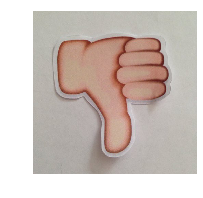

In [97]:
# Getting a random sample from train part of LabelList
X_sample, y_sample = data.train[80]
X_sample.show()
print(y_sample, X_sample.shape)

In [0]:
tfms = get_transforms()
data = data.transform(tfms, size=224)
# Here we applied the defualt transformations to the dataset.
# get_transforms() will fetch all default transforms
# we can also write our own tranformation in a function and pass
# that function to .transform() instead
# The size in .trainsform() tells the API to convert all
# images to same size. This is important for normalization

In [0]:
data = data.databunch(bs=16).normalize()
# finally get the fatabunch and normalize the data

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8fd80effd0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


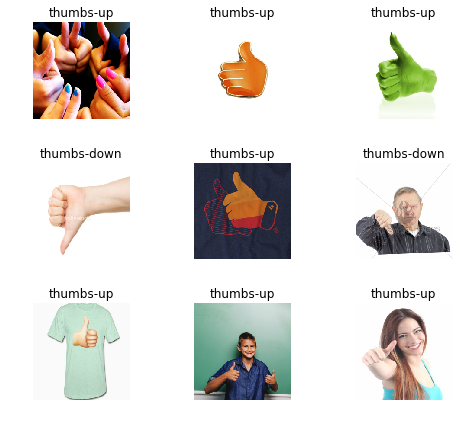

In [104]:
data.show_batch(rows=3, figsize=(7, 6))